In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
survey = pd.read_csv('./SBU_example_Surveydata_2014_2.csv')
print(survey.shape)
survey.head()

(6865, 120)


,STATE,GEOSTR,DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,...,HCVPRIME,HCVPRIMA,HLTHPREG,PREGEVER,BRTHCNTL3,TYPCNTRL2,NOBCUSE2,PFCHLDFT,PRNTLVIT,REGION
0,New York,201,D,To be called,40136,28,April,4252014,4,25,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
1,New York,202,D,To be called,10105,17,January,3162014,3,16,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)
2,New York,201,D,To be called,110014,4,November,11292014,November,29,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
3,New York,201,D,To be called,110083,6,November,11252014,November,25,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,NYS exclusive of NYC
4,New York,202,D,To be called,50129,7,May,10052014,October,5,...,Not asked or Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,NaN,NaN,NaN,Not asked or Missing,NaN,New York City (NYC)


In [177]:
features = ['NUMADULT', 'GENHLTH', 'HLTHPLN1', 'EXERANY2', 'AGE', 'MARITAL', 'EDUCA', 'INCOME2',
            'SEX', 'PREGNANT', 'PDIABTST', 'PREDIAB1', 'BMI5CAT', 'CHLDCNT', 'DRNKANY5', 'DRNKDY4',
            'SSBSUGAR', 'SSBFRUT2', 'LIFECHG', 'DIABETE3']
data = survey[features]

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6865 entries, 0 to 6864
Data columns (total 20 columns):
NUMADULT    4696 non-null float64
GENHLTH     6865 non-null object
HLTHPLN1    6865 non-null object
EXERANY2    6865 non-null object
AGE         6865 non-null object
MARITAL     6865 non-null object
EDUCA       6865 non-null object
INCOME2     6865 non-null object
SEX         6865 non-null object
PREGNANT    6865 non-null object
PDIABTST    6865 non-null object
PREDIAB1    6865 non-null object
BMI5CAT     6865 non-null object
CHLDCNT     6865 non-null object
DRNKANY5    6865 non-null object
DRNKDY4     6865 non-null object
SSBSUGAR    6865 non-null object
SSBFRUT2    6865 non-null object
LIFECHG     6865 non-null object
DIABETE3    6865 non-null object
dtypes: float64(1), object(19)
memory usage: 1.0+ MB


In [179]:
data.head()

,NUMADULT,GENHLTH,HLTHPLN1,EXERANY2,AGE,MARITAL,EDUCA,INCOME2,SEX,PREGNANT,PDIABTST,PREDIAB1,BMI5CAT,CHLDCNT,DRNKANY5,DRNKDY4,SSBSUGAR,SSBFRUT2,LIFECHG,DIABETE3
0,NaN,Very good,Yes,No,Age 65 or older,Divorced,College 1 year to 3 years (Some college or tec...,Don't know/Not sure,Male,Not asked or Missing,Not asked or Missing,Not asked or Missing,Overweight,One child in household,No,Did not drink,Not asked or Missing,Not asked or Missing,Not asked or Missing,No
1,NaN,Very good,Yes,Yes,Age 65 or older,Divorced,College 4 years or more (College graduate),Less than $50000 ($35000 to less than $50000),Female,Not asked or Missing,Not asked or Missing,Not asked or Missing,Normal Weight,No children in household,No,Did not drink,Not asked or Missing,Not asked or Missing,Not asked or Missing,No
2,NaN,Good,Yes,Yes,Age 35 - 44,Married,College 4 years or more (College graduate),$75000 or more,Female,No,Not asked or Missing,Not asked or Missing,Normal Weight,One child in household,Yes,Don't know/Not sure/Refused/Missing,Not asked or Missing,Not asked or Missing,Not asked or Missing,No
3,NaN,Very good,Yes,Yes,Age 65 or older,Married,College 4 years or more (College graduate),$75000 or more,Male,Not asked or Missing,Not asked or Missing,Not asked or Missing,Overweight,No children in household,Yes,Number of drinks per day,Not asked or Missing,Not asked or Missing,Not asked or Missing,No
4,NaN,Excellent,Yes,Yes,Age 35 - 44,Married,College 4 years or more (College graduate),$75000 or more,Female,No,Not asked or Missing,Not asked or Missing,Overweight,No children in household,No,Did not drink,Not asked or Missing,Not asked or Missing,Not asked or Missing,No


In [180]:
# factorize DIABETES into health_status
data = data[data.DIABETE3.isin(['No', 'Yes'])]
cat = pd.Categorical(data.DIABETE3, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
print(unique)
data['health_status'] = labels

# fill NA NUMADULT
data.NUMADULT.fillna(0, inplace=True)
data['num_adult'] = data.NUMADULT.astype(int)

# Process GENHLTH
data = data[data.GENHLTH.isin(['Very good', 'Good', 'Excelent', 'Fair', 'Poor'])]

# Process HLTHPLN1
data = data[data.HLTHPLN1.isin(['No', 'Yes'])]
cat = pd.Categorical(data.HLTHPLN1, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['health_coverage'] = labels

# Process EXERANY2
data = data[data.EXERANY2.isin(['No', 'Yes'])]
cat = pd.Categorical(data.EXERANY2, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['physical_activities'] = labels

# Process Age
data = data[~data.AGE.isin(['Refused'])]

# Process MARITAL
data = data[~data.MARITAL.isin(['Refused', 'Not asked or Missing'])]
data.MARITAL[data.MARITAL == 'A member of an unmarried couple'] = 'Couple'

# Process EDUCA
def education_map(x):
    if x == 'College 4 years or more (College graduate)': return 'College graduate'
    elif x == 'Grade 12 or GED (High school graduate)': return 'High school graduate'
    elif x == 'College 1 year to 3 years (Some college or technical school)': return 'Some college or technical school'
    elif x == 'Grades 9 through 11 (Some high school)': return 'Some high school'
    elif x == 'Grades 1 through 8 (Elementary)': return 'Elementary'
    else: return 'No Education'

data = data[~data.EDUCA.isin(['Refused', 'Not asked or Missing'])]
data['education'] = data.EDUCA.apply(education_map)

# Process INCOME2
def income_map(x):
    if x == 'Less than $10000': return '0-10k'
    elif x == 'Less than $15000 ($10000 to less than $15000)': return '10k-15k'
    elif x == 'Less than $20000 ($15000 to less than $20000)': return '15k-20k'
    elif x == 'Less than $25000 ($20000 to less than $25000)': return '20k-25k'
    elif x == 'Less than $35000 ($25000 to less than $35000)': return '25k-35k'
    elif x == 'Less than $50000 ($35000 to less than $50000)': return '35k-50k'
    elif x == 'Less than $75000 ($50000 to less than $75000)': return '50k-75k'
    else: return '75k+'

data = data[~data.INCOME2.isin(['Refused', "Don't know/Not sure/Missing", 'Not asked or Missing'])]
data['Income'] = data.INCOME2.apply(income_map)

# Process SEX
cat = pd.Categorical(data.SEX, categories=['Female', 'Male'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['SEX'] = labels

# Process PDIABTST
data = data[data.PDIABTST.isin(['No', 'Yes', 'Not asked or Missing'])]

# Process PREDIAB1
data = data[data.PREDIAB1.isin(['No', 'Yes', 'Not asked or Missing'])]

# Process BMI5CAT
data = data[~data.BMI5CAT.isin(["Don't know/Refused/Missing"])]

# Process CHLDCNT
data = data[~data.CHLDCNT.isin(["Don't know/Not sure/Missing"])]

# Process DRNKANY5
data = data[data.DRNKANY5.isin(['No', 'Yes'])]
cat = pd.Categorical(data.DRNKANY5, categories=['No', 'Yes'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['drink30'] = labels

# Process DRNKDY4
data['DRNKDY4'] = data.DRNKDY4.apply(lambda x: 'Did not drink' if x == 'Did not drink' else 'Number of drinks per day')
cat = pd.Categorical(data.DRNKDY4, categories=['Did not drink', 'Number of drinks per day'], ordered=True)
labels, unique = pd.factorize(cat, sort=True)
data['drink_per_day'] = labels

# Process SSBSUGAR
data = data[~data.SSBSUGAR.isin(['Refused', "Don't know/Not sure"])]

# Process SSBFRUT2
data = data[~data.SSBFRUT2.isin(['Refused', "Don't know/Not sure"])]

# Process LIFECHG
data = data[~data.LIFECHG.isin(['Refused'])]

[No, Yes]
Categories (2, object): [No < Yes]


In [181]:
features = ['num_adult', 'GENHLTH', 'health_coverage', 'physical_activities', 'AGE', 'MARITAL', 'EDUCA', 
            'Income', 'SEX', 'PDIABTST', 'PREDIAB1', 'BMI5CAT', 'CHLDCNT', 'drink30', 'drink_per_day',
            'SSBSUGAR', 'SSBFRUT2', 'LIFECHG', 'health_status']
data = data[features]
data.head()

,num_adult,GENHLTH,health_coverage,physical_activities,AGE,MARITAL,EDUCA,Income,SEX,PDIABTST,PREDIAB1,BMI5CAT,CHLDCNT,drink30,drink_per_day,SSBSUGAR,SSBFRUT2,LIFECHG,health_status
0,0,Very good,1,0,Age 65 or older,Divorced,College 1 year to 3 years (Some college or tec...,75k+,1,Not asked or Missing,Not asked or Missing,Overweight,One child in household,0,0,Not asked or Missing,Not asked or Missing,Not asked or Missing,0
1,0,Very good,1,1,Age 65 or older,Divorced,College 4 years or more (College graduate),35k-50k,0,Not asked or Missing,Not asked or Missing,Normal Weight,No children in household,0,0,Not asked or Missing,Not asked or Missing,Not asked or Missing,0
2,0,Good,1,1,Age 35 - 44,Married,College 4 years or more (College graduate),75k+,0,Not asked or Missing,Not asked or Missing,Normal Weight,One child in household,1,1,Not asked or Missing,Not asked or Missing,Not asked or Missing,0
3,0,Very good,1,1,Age 65 or older,Married,College 4 years or more (College graduate),75k+,1,Not asked or Missing,Not asked or Missing,Overweight,No children in household,1,1,Not asked or Missing,Not asked or Missing,Not asked or Missing,0
6,0,Very good,1,1,Age 18 - 24,Never married,College 1 year to 3 years (Some college or tec...,75k+,1,Not asked or Missing,Not asked or Missing,Normal Weight,One child in household,1,1,Not asked or Missing,Not asked or Missing,Not asked or Missing,0


In [182]:
data.health_status.value_counts()

0    3650
1     689
Name: health_status, dtype: int64

In [183]:
from sklearn.utils import resample

# Upsample minority class
data_upsampled = resample(data[data.health_status == 1], 
                                 replace=True,     # sample with replacement
                                 n_samples=3000,    # to match majority class
                                 random_state=123)

data_full = pd.concat([data, data_upsampled])

In [184]:
data_full.health_status.value_counts()

1    3689
0    3650
Name: health_status, dtype: int64

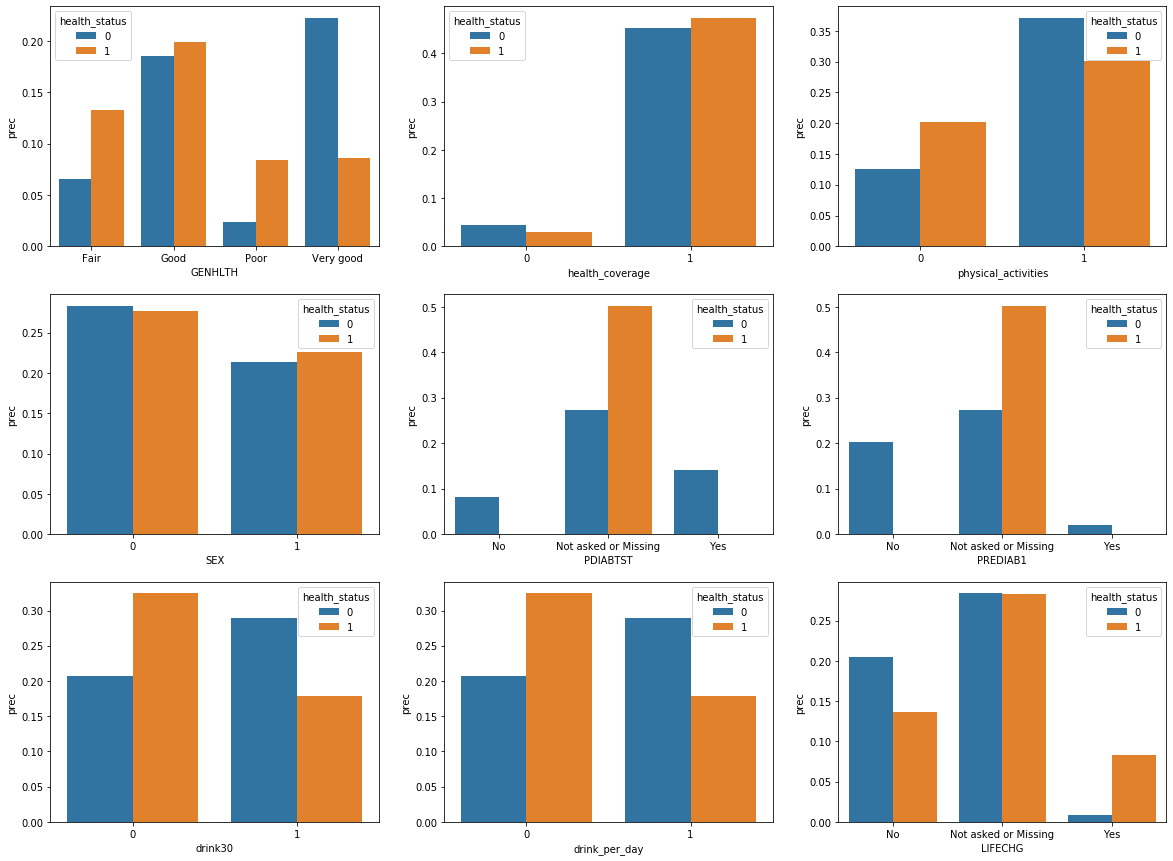

In [185]:
n = data_full.shape[0]
feature_plot = ['GENHLTH', 'health_coverage', 'physical_activities', 'SEX', 'PDIABTST', 'PREDIAB1', 'drink30', 'drink_per_day', 'LIFECHG']

plt.figure(figsize=(20,15))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    temp = data_full.groupby([feature_plot[i-1], 'health_status']).size().reset_index()
    temp['prec'] = temp[0]/n
    sns.barplot(x=feature_plot[i-1], y='prec', hue='health_status', data=temp )
plt.show()

In [186]:
data_full.groupby(['PDIABTST', 'health_status']).size().reset_index().sort_values(0, ascending=False)

,PDIABTST,health_status,0
2,Not asked or Missing,1,3689
1,Not asked or Missing,0,2012
3,Yes,0,1036
0,No,0,602


In [187]:
survey.groupby(['PDIABTST', 'DIABETE3']).size().reset_index().sort_values(0, ascending=False)

,PDIABTST,DIABETE3,0
6,Not asked or Missing,No,3101
13,Yes,No,1647
2,No,No,980
9,Not asked or Missing,Yes,842
0,Don't know/Not Sure,No,116
7,Not asked or Missing,No pre-diabetes or borderline diabetes,70
14,Yes,No pre-diabetes or borderline diabetes,39
10,Not asked or Missing,Yes but female told only during pregnancy,26
16,Yes,Yes but female told only during pregnancy,18
4,No,Yes but female told only during pregnancy,7


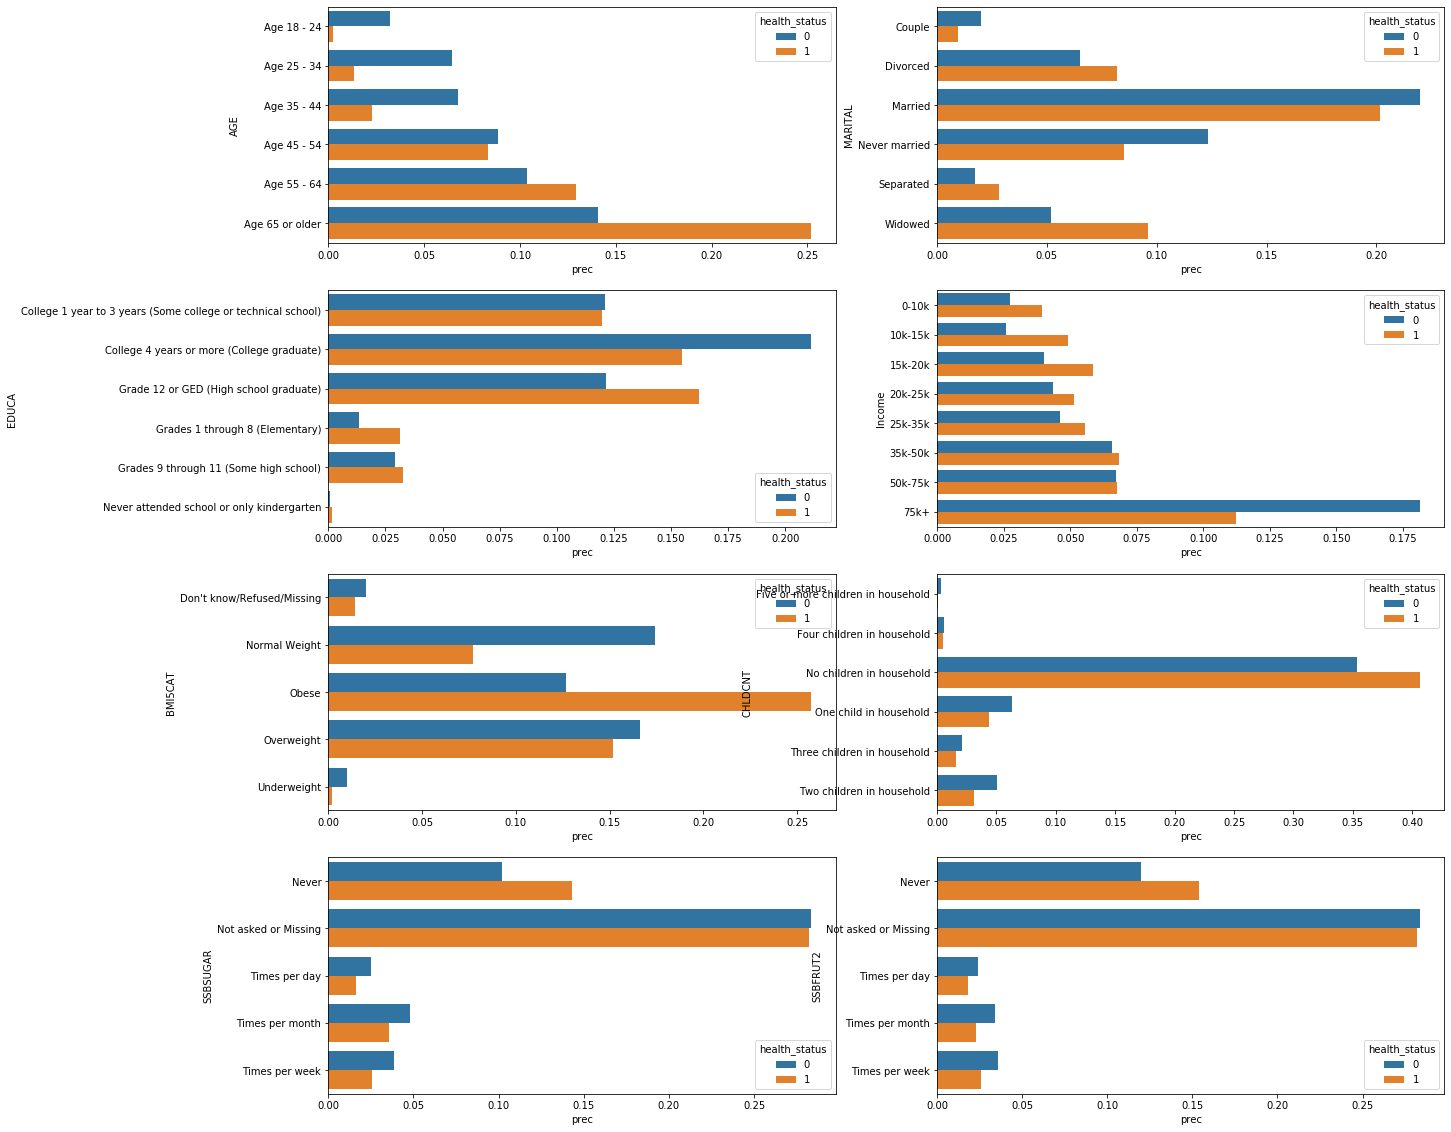

In [188]:
n = data_full.shape[0]
feature_plot = ['AGE', 'MARITAL', 'EDUCA', 'Income', 'BMI5CAT', 'CHLDCNT', 'SSBSUGAR', 'SSBFRUT2']

plt.figure(figsize=(20,20))
for i in range(1, 9):
    plt.subplot(4, 2, i)
    temp = data_full.groupby([feature_plot[i-1], 'health_status']).size().reset_index()
    temp['prec'] = temp[0]/n
    sns.barplot(x='prec', y=feature_plot[i-1], hue='health_status', data=temp)
plt.show()

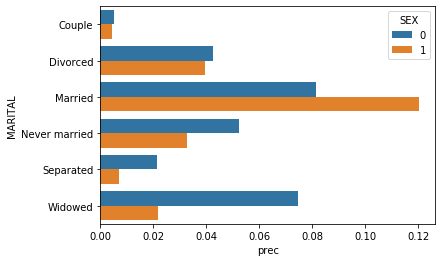

In [193]:
temp = data_full[data_full.health_status==1].groupby(['SEX', 'MARITAL']).size().reset_index()
temp['prec'] = temp[0]/n
sns.barplot(x='prec', y='MARITAL', hue='SEX', data=temp)